In [51]:
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('dailyStats.csv')
# df=df[df['type']=='INFECTED']
dfx=df['datetime']
dfy=df["new_cases"]
raw_y=dfy.to_numpy()
y=dfy
# for i in range(raw_y.shape[0]):
#     y.append(int(raw_y[i].split(' ')[0].replace(',','')))
y=np.array(y)
dfx=pd.to_datetime(dfx)
dfx=dfx.map(dt.datetime.toordinal)
x=dfx.to_numpy()
x=x[:,np.newaxis]


(463, 463, 3)
Accuracy 27.37178419579983% on test size


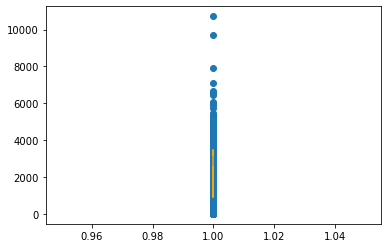

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=
                                 2)
x=poly_features.fit_transform(x)
tau = .005
w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(x.shape[0])])
print(w.shape)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1000)
clf = LinearRegression()
clf.fit(x_train,y_train)

s=clf.score(x_test,y_test)
print("Accuracy {0}% on test size".format(s*100))
y_pred=clf.predict(x_train)

tempDates = x_train[:,[0]]
# dates = []
# for item in tempDates:
#     dates.append(str(datetime.fromordinal(item[0])))

# dates = np.array([dates]).reshape([118,1])
# import matplotlib.dates as mdates



# dates.shape

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.scatter(x_train[:,[0]],y_train)
plt.plot(x_train[:,[0]],y_pred,color="orange")

In [53]:
v1=dt.datetime.now().toordinal()
from datetime import timedelta  
import math
from datetime import datetime


dates = []
for i in range(1, 6):
    dates.append((dt.datetime.now() + timedelta(days=i)).toordinal())

v=np.array(dates)
i = 0
v=poly_features.fit_transform(v[:,np.newaxis])

cases = clf.predict(v)
for item in cases:
    date = str(datetime.fromordinal(dates[i]))
    print(date, math.ceil(item))
    i = i + 1

2021-05-12 00:00:00 3497
2021-05-13 00:00:00 3507
2021-05-14 00:00:00 3518
2021-05-15 00:00:00 3529
2021-05-16 00:00:00 3539


In [112]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(max_iter=1000,hidden_layer_sizes=(100,10,10,10,10,5),activation='relu',alpha=0)
nn.fit(x_train,y_train)
nn.score(x_train,y_train)
y_pred=nn.predict(x_train)
# plt.scatter(x_train[:,[0]],y_train)
# plt.scatter(x_train[:,[0]],y_pred,color="orange")

v1=dt.datetime.now().toordinal()
from datetime import timedelta  
import math

dates = []
for i in range(1, 11):
    dates.append((dt.datetime.now() + timedelta(days=i)).toordinal())

v=np.array(dates)
cases = nn.predict(v[:,np.newaxis])
i = 0
for item in cases:
    date = str(datetime.fromordinal(dates[i]))
    print(math.ceil(item))
    i += 1

1778
1778
1778
1778
1778
1778
1778
1778
1778
1778
